In [291]:
# Importing the libraries

# General
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import missingno
import tensorflow as tf 
from tensorflow import keras

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split

# DATA

In [292]:
# Importing the data
original_data = pd.read_csv('DataScienceChallenge.csv')

In [293]:
# Exploring the data

# Total rows and columns
original_data.shape

# Looking at the column names
original_data.columns

# Info
# original_data.info()

# Describe the all the numeric data
original_data.describe()

# Looking at the dependent variable's values
original_data['y'].astype(str).unique()

# From the above we notice that the target variable is of type 'float'

array(['0.0', '9.99', '1.38504', '2.49', '18.0', '4.99', '2.99', '2.0',
       '2.533026481', '20.100479999999997', '8.0', '4.0', '12.0', '15.0',
       '5.97', '1.0', '4.48', '36.0', '68.43', '116.81',
       '6.986000000000001', '1.99', '24.98', '9.730080000000001',
       '22.2024', '2.77704', '46.88', '19.02608', '13.96', '67.0',
       '4.85808', '17.97', '2.7347072289999996', '4.1620800000000004',
       '3.98', '6.48', '2000.0', '2.77008', '2.0810400000000002', '13.94',
       '7.0', '0.99', '3.99', '19.97', '11.98', '25.0', '23.70007731',
       '3.47304', '6.97', '9.96', '13.899120000000002',
       '3.7491382110000004', '7.63512', '7.62816', '206.81',
       '11.811119999999999', '17.94608', '4.97', '37.95', '56.37',
       '2.664213656', '7.98', '0.68904', '6.0', '107.91', '11.0', '12.96',
       '65.94', '48.93', '6.243119999999999', '9.0', '64.0', '14.0',
       '3.0', '429.94', '7.385039999999999', '30.0', '77.84', '6.95304',
       '20.93', '9.03408', '11.30527972'], dty

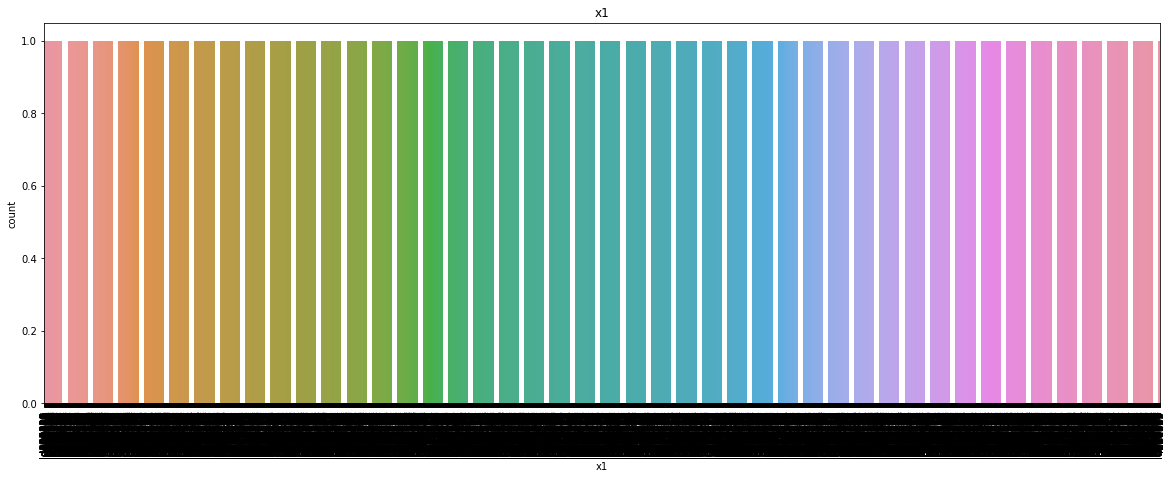

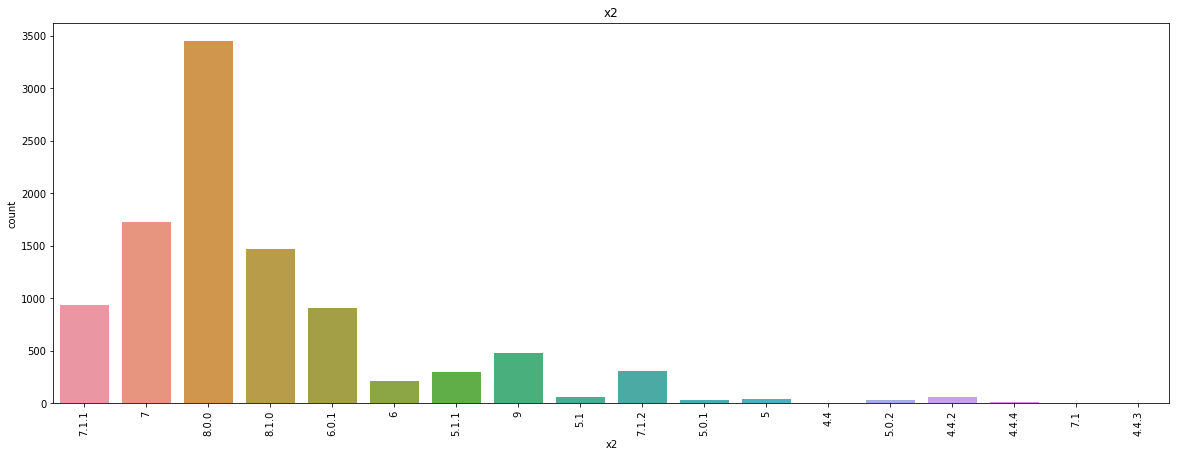

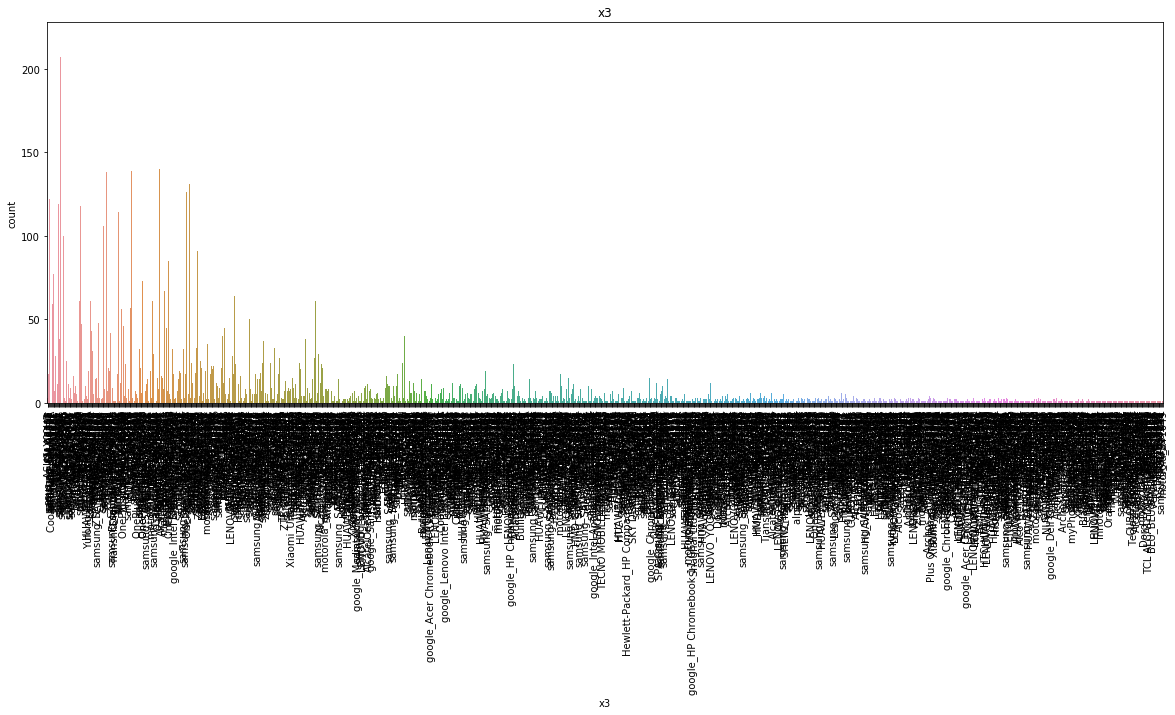

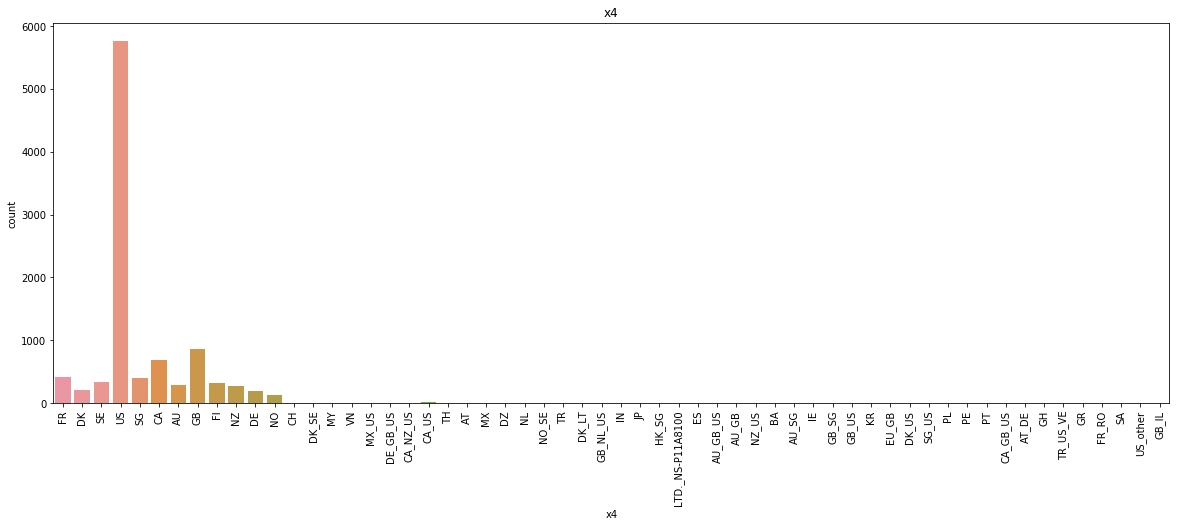

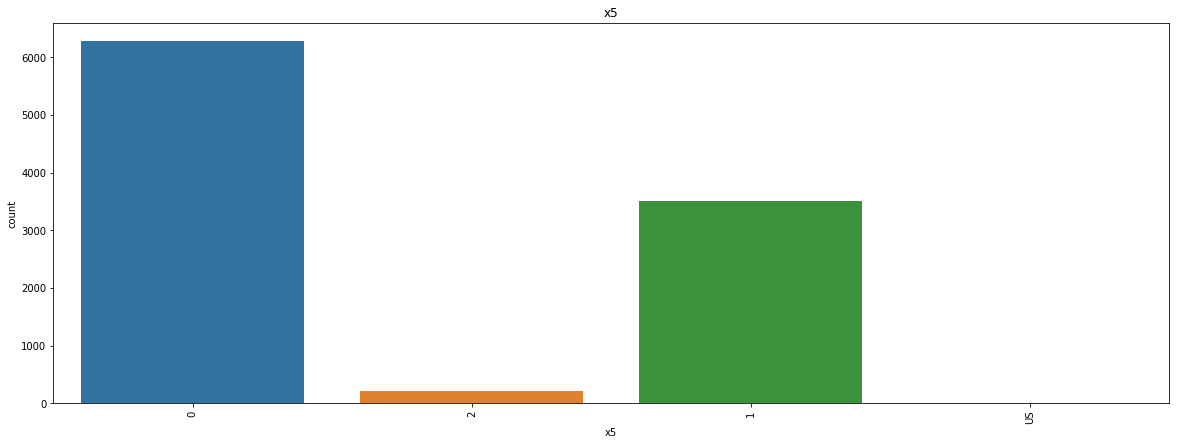

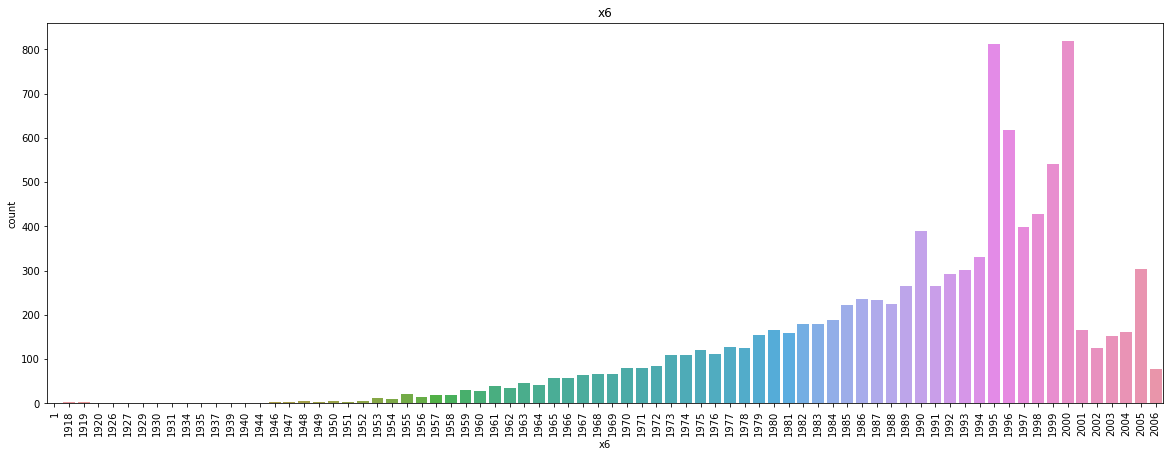

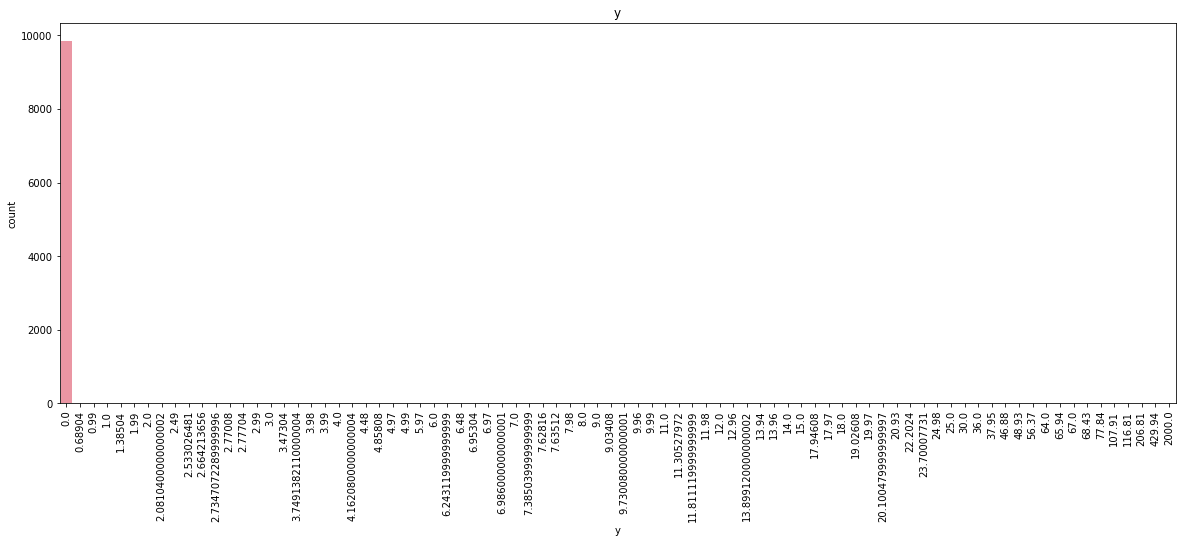

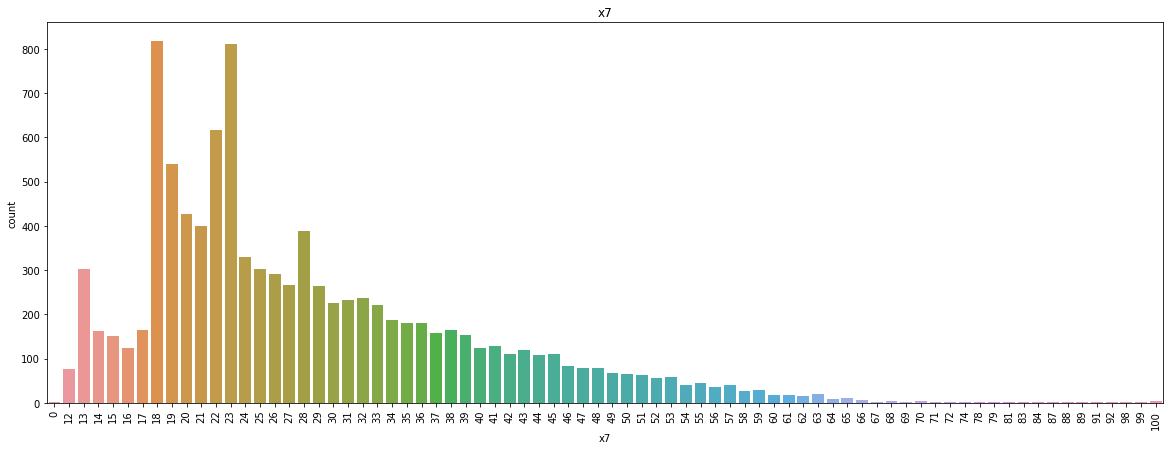

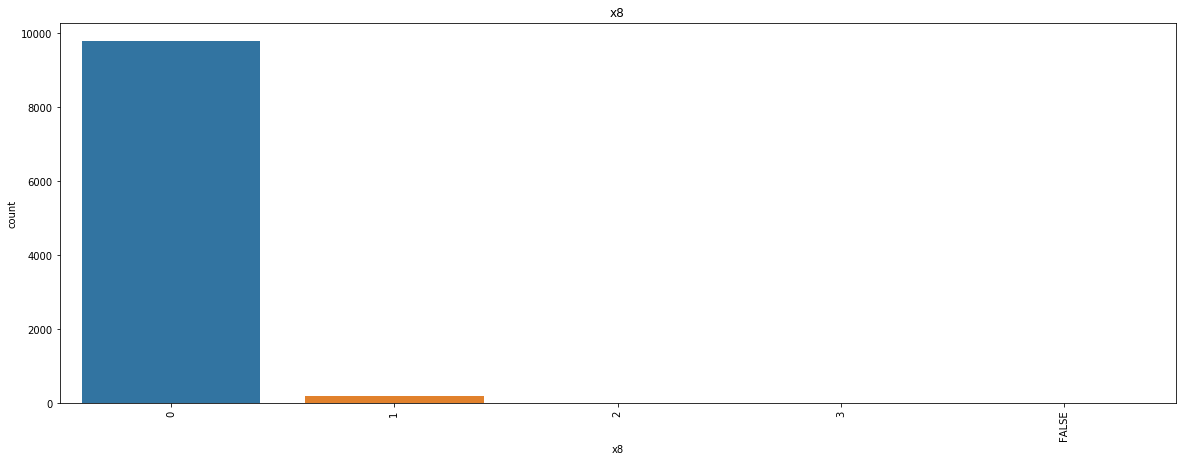

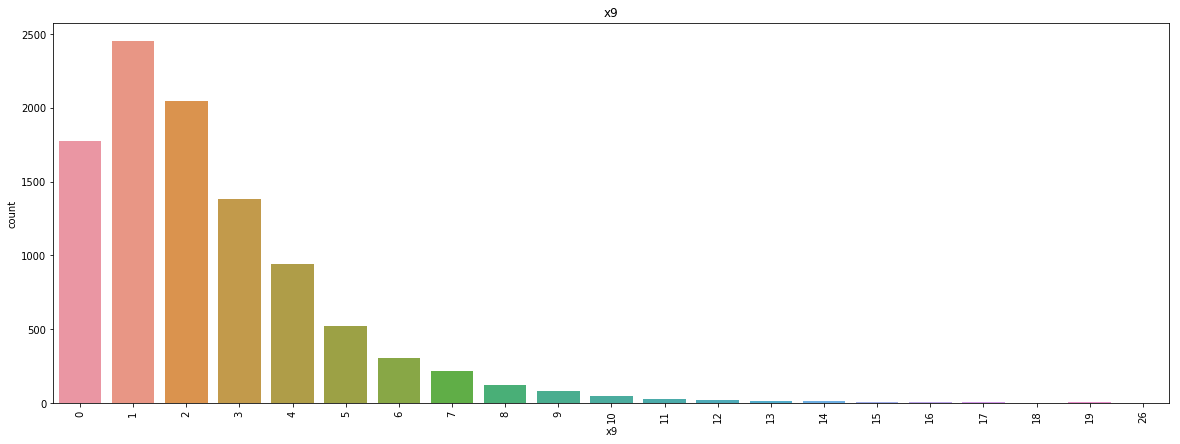

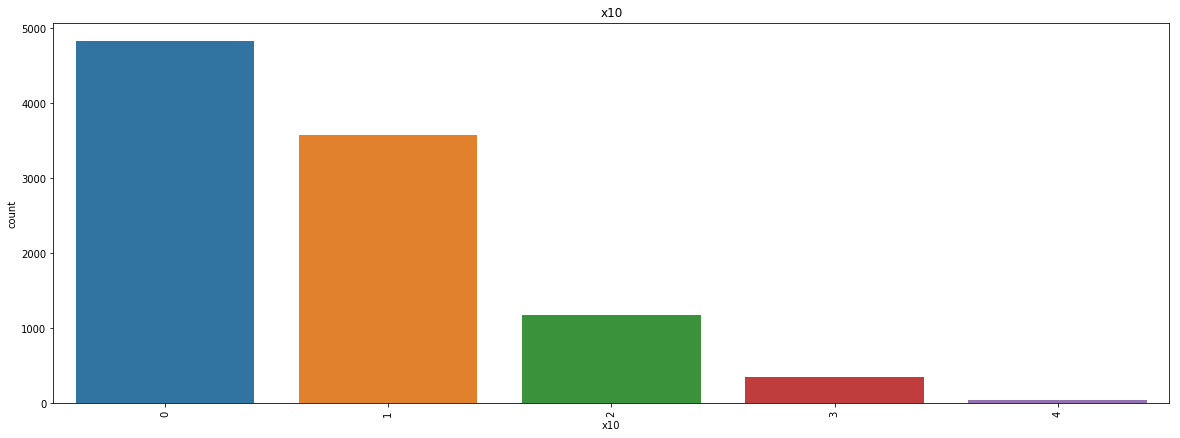

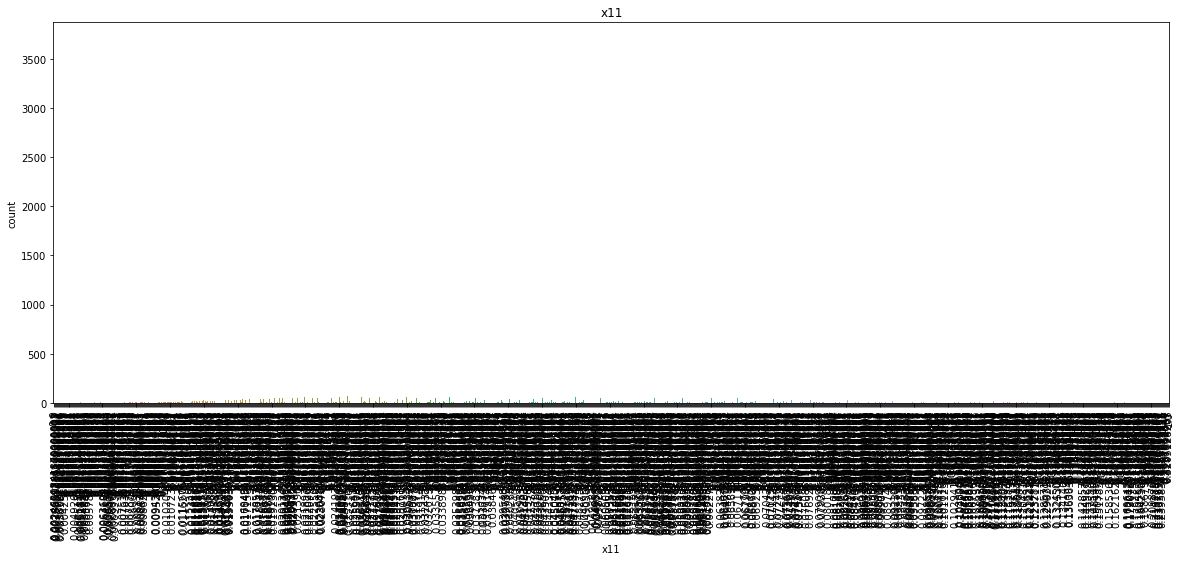

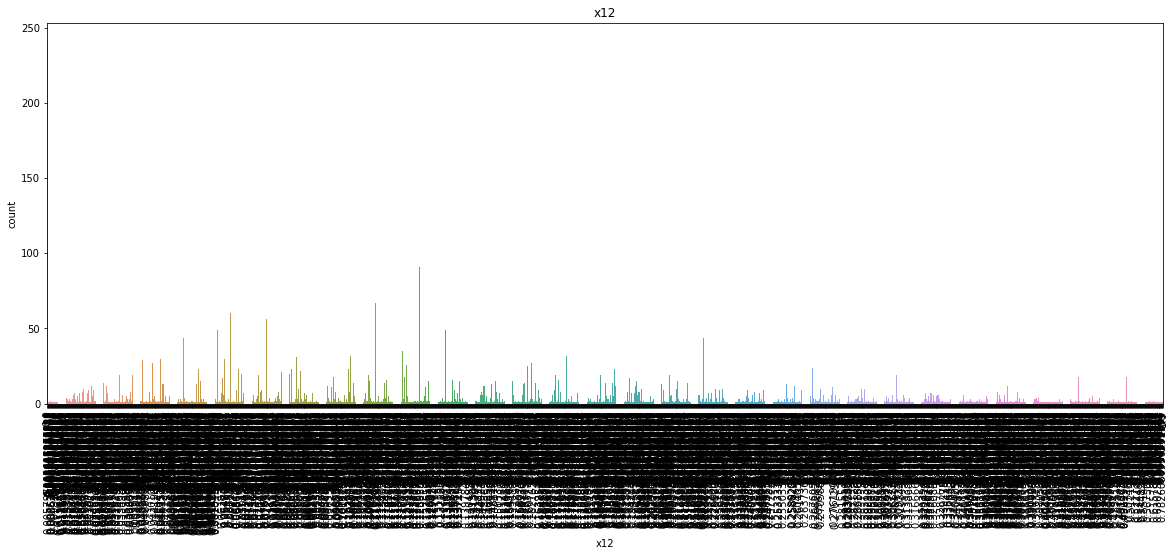

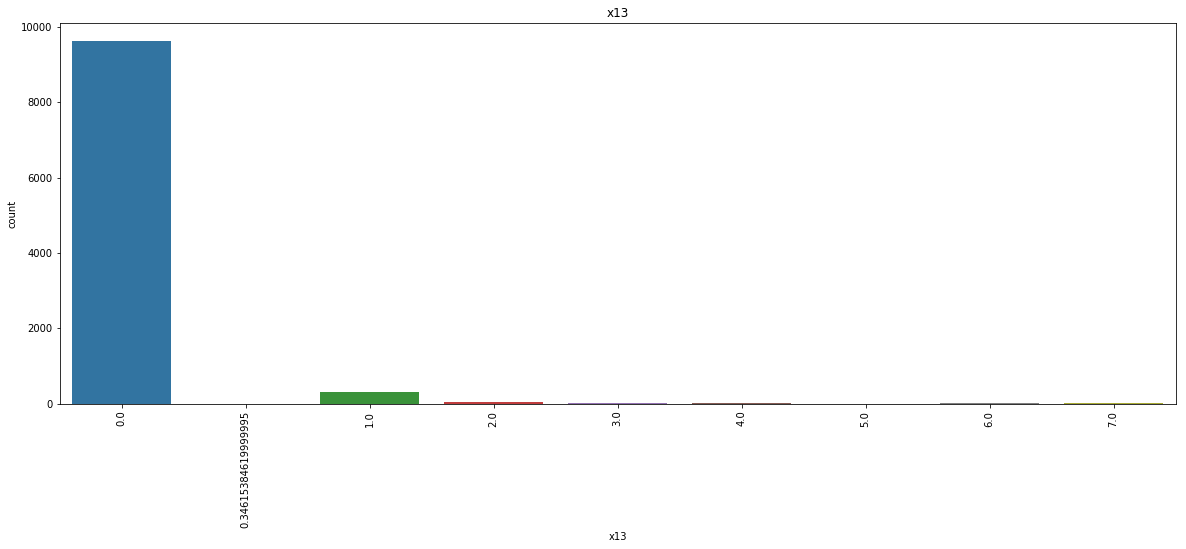

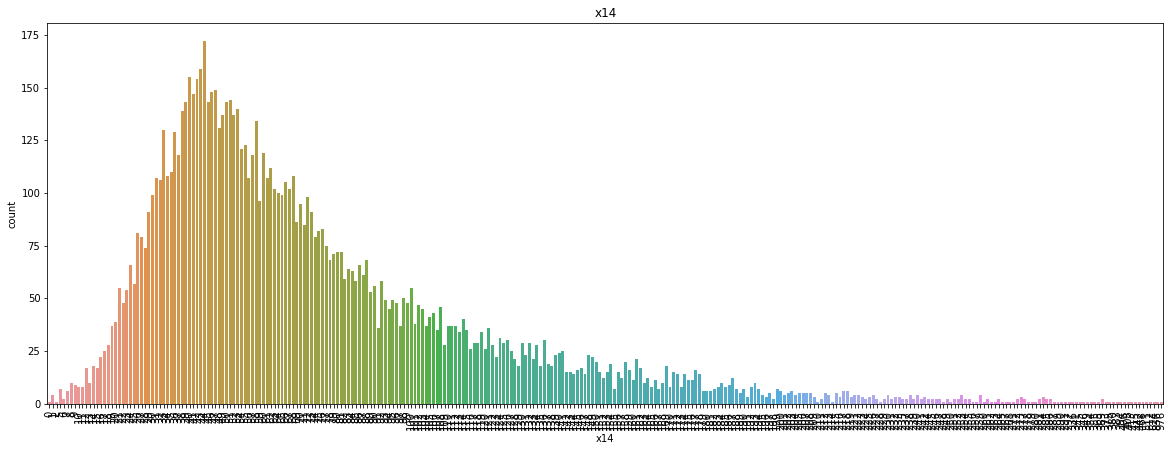

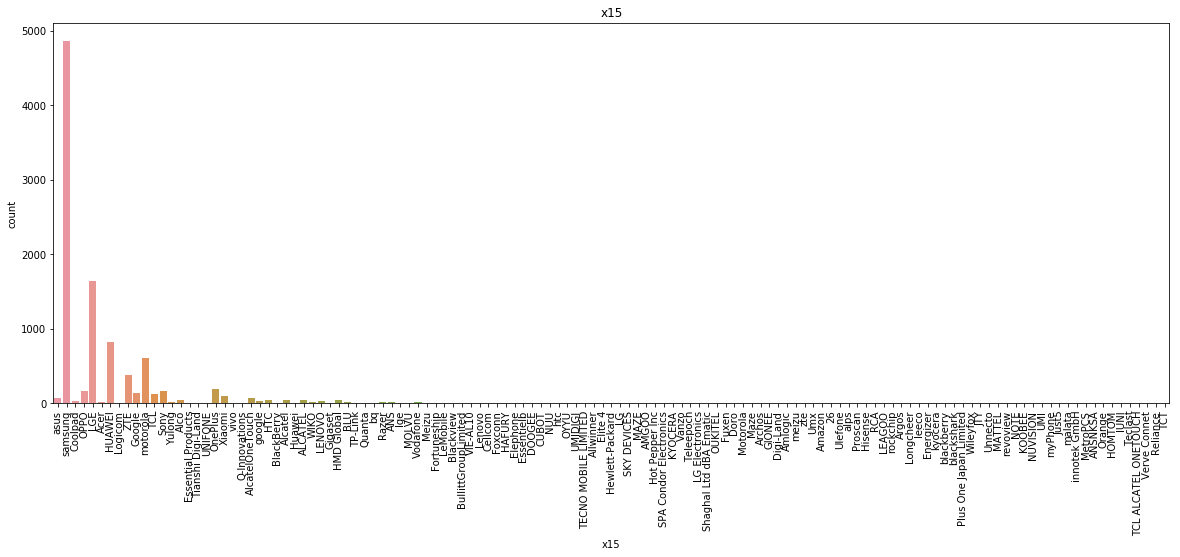

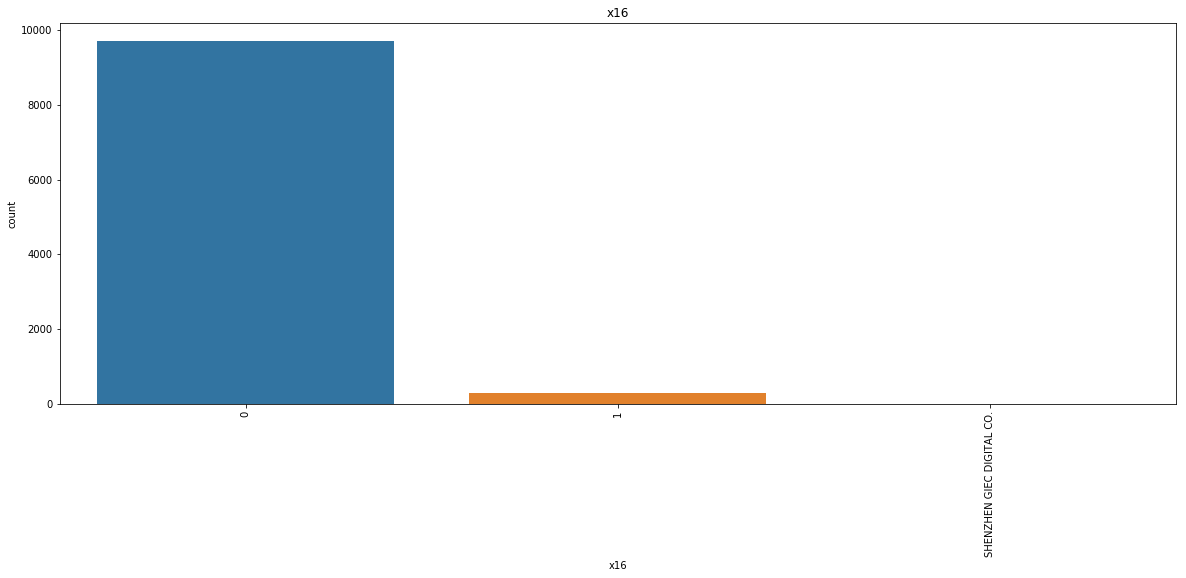

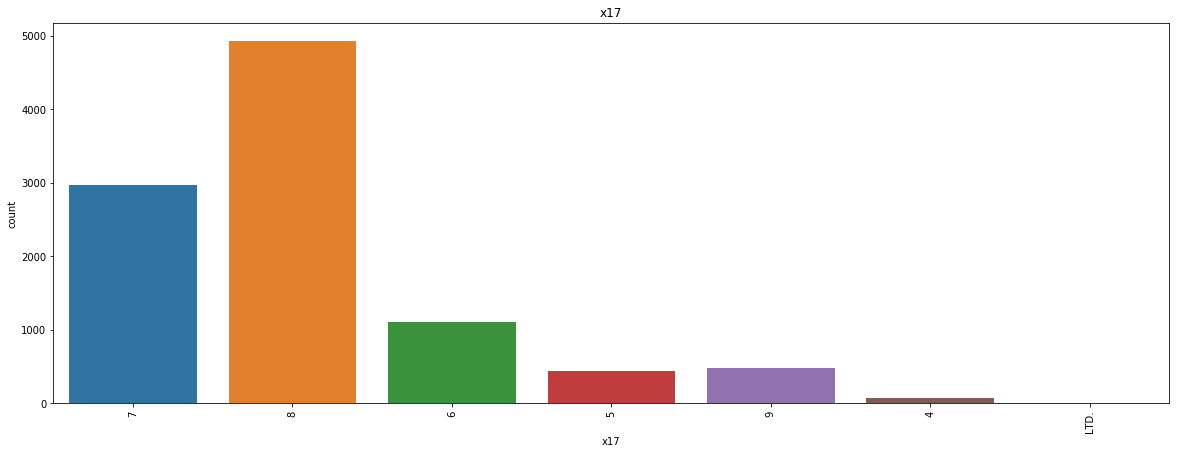

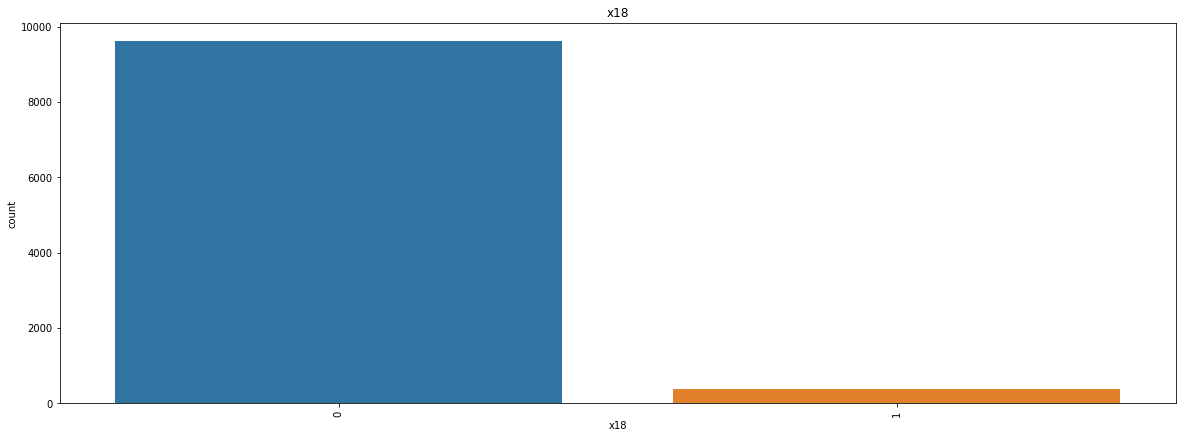

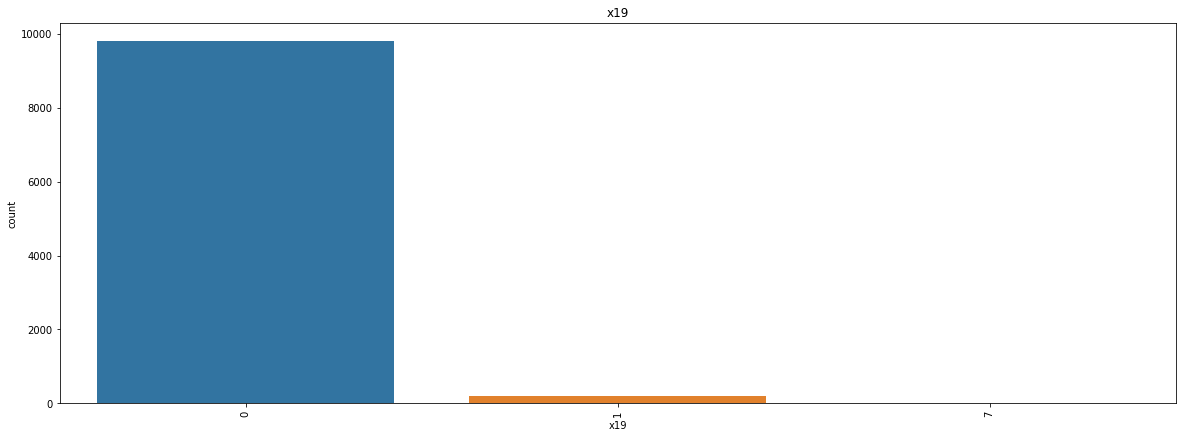

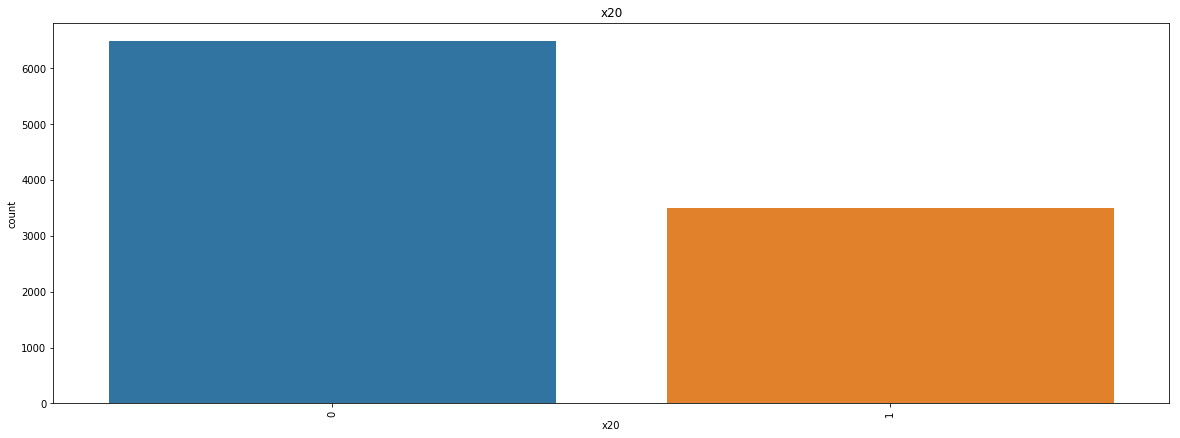

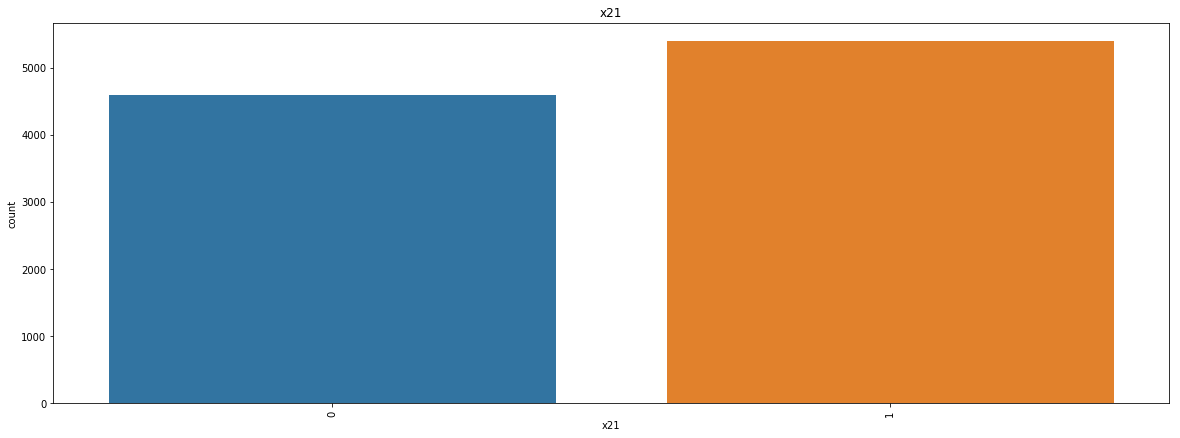

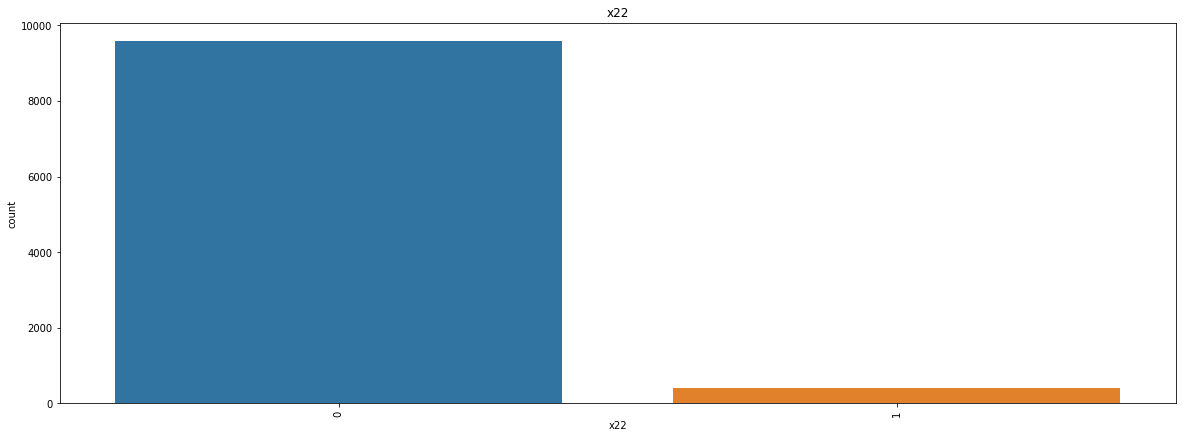

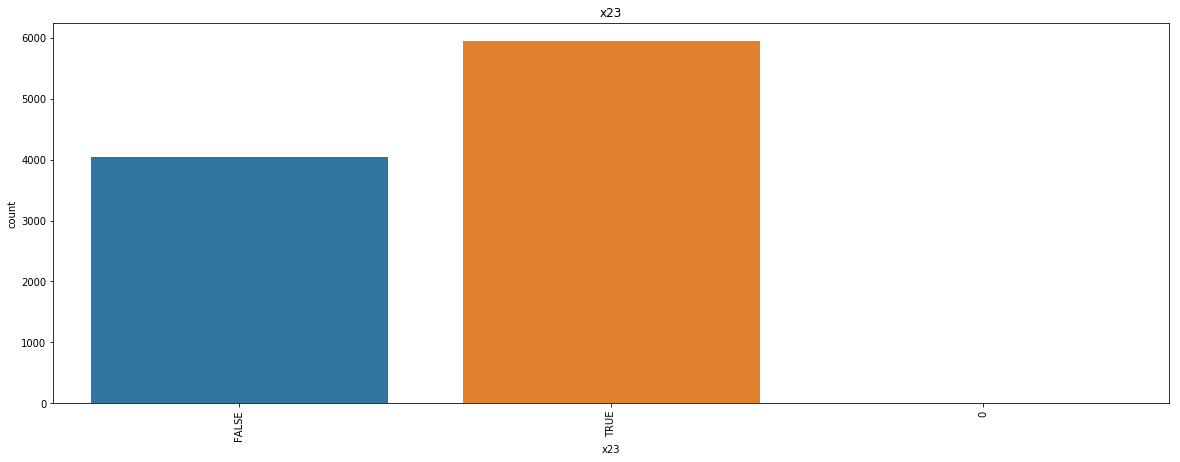

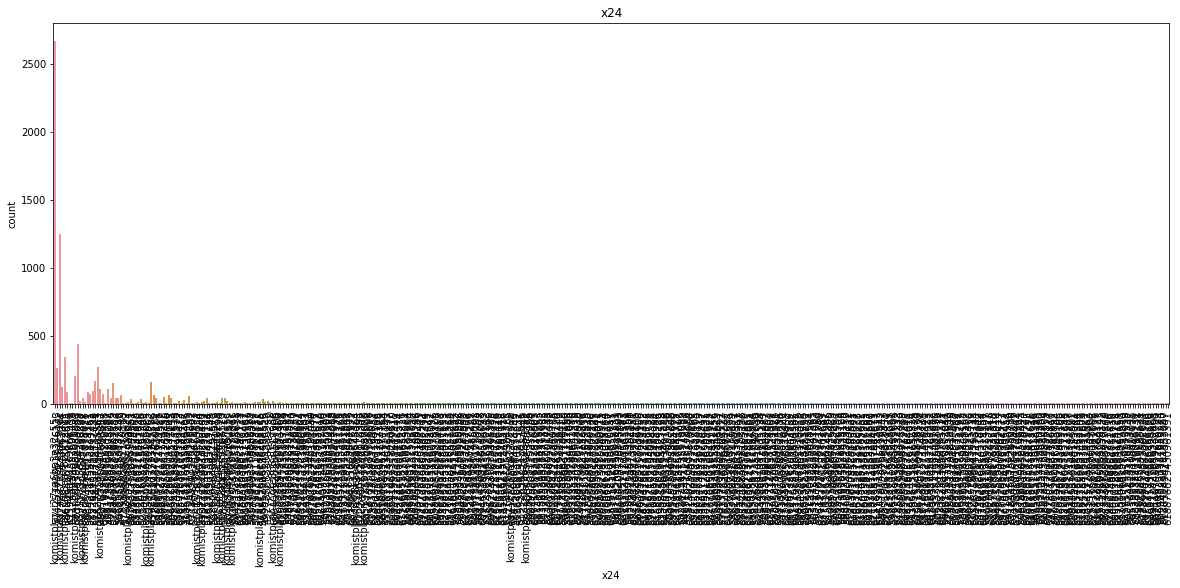

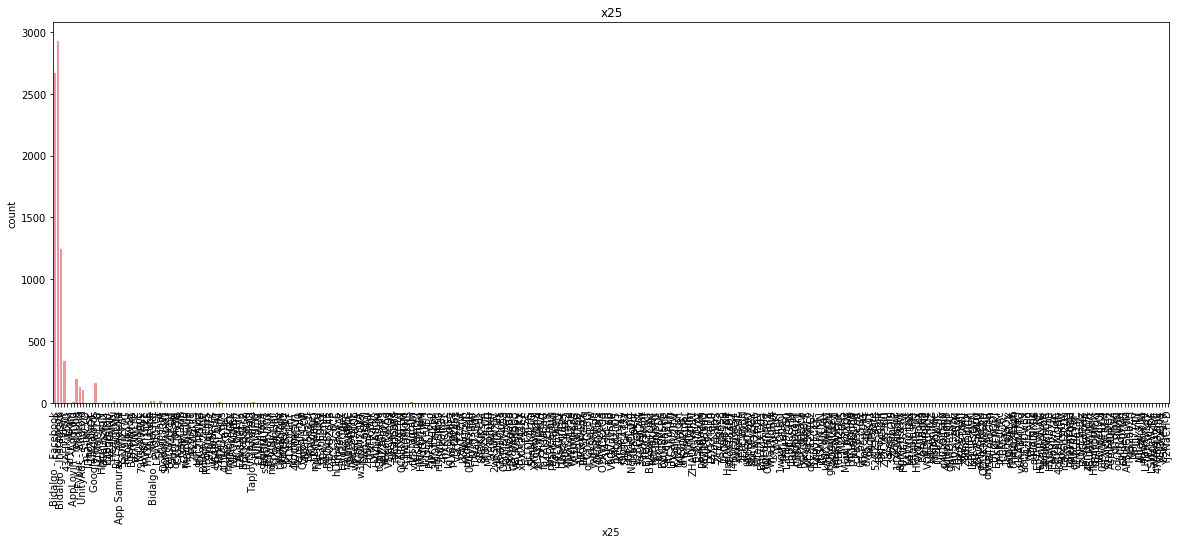

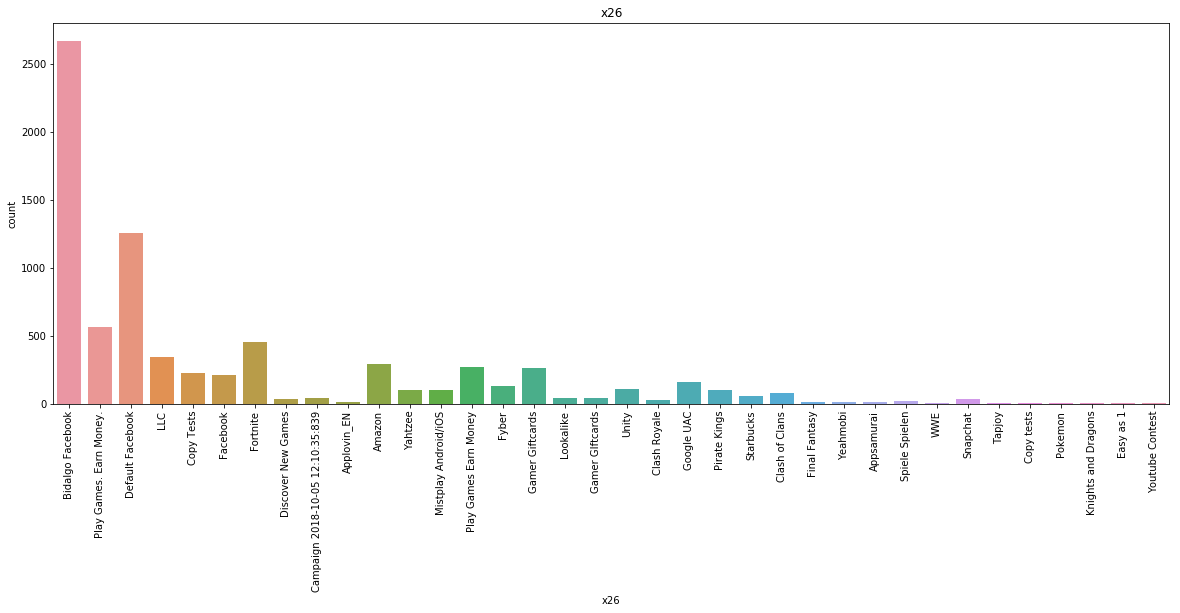

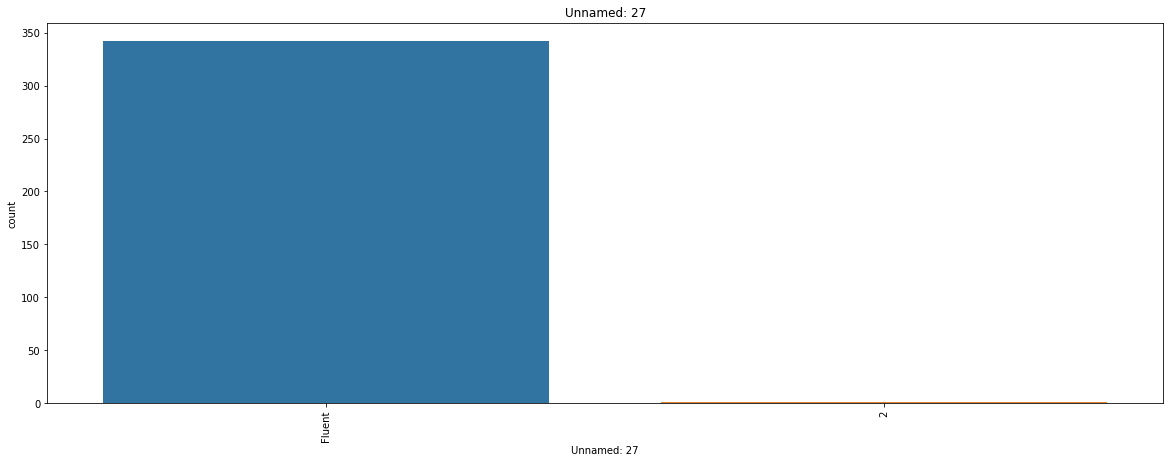

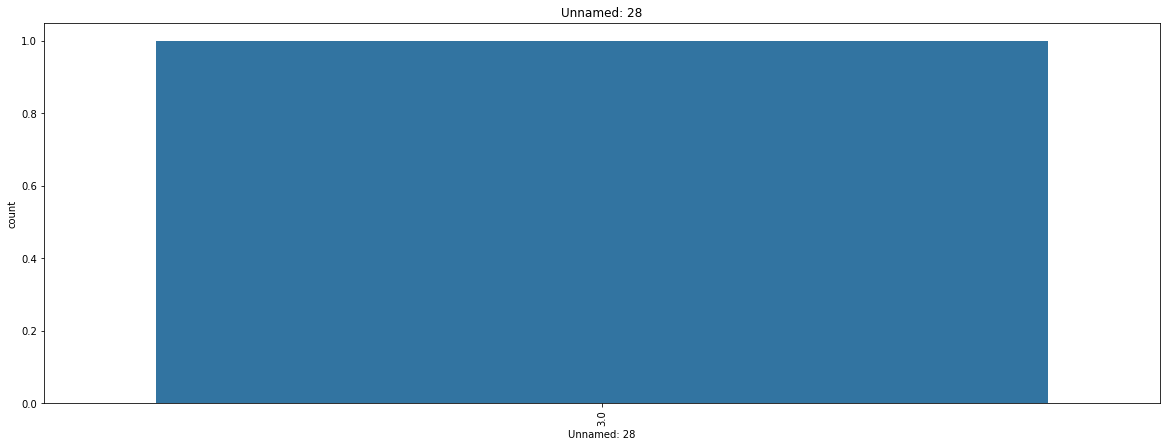

In [21]:
# Looking at the value counts for all columns
cols = original_data.columns

for i in cols:
    ax, fig = plt.subplots(figsize = (20,7))
    ax = sns.countplot(original_data[i])
    plt.xticks(rotation = 'vertical')
    plt.title(i)
    plt.show()

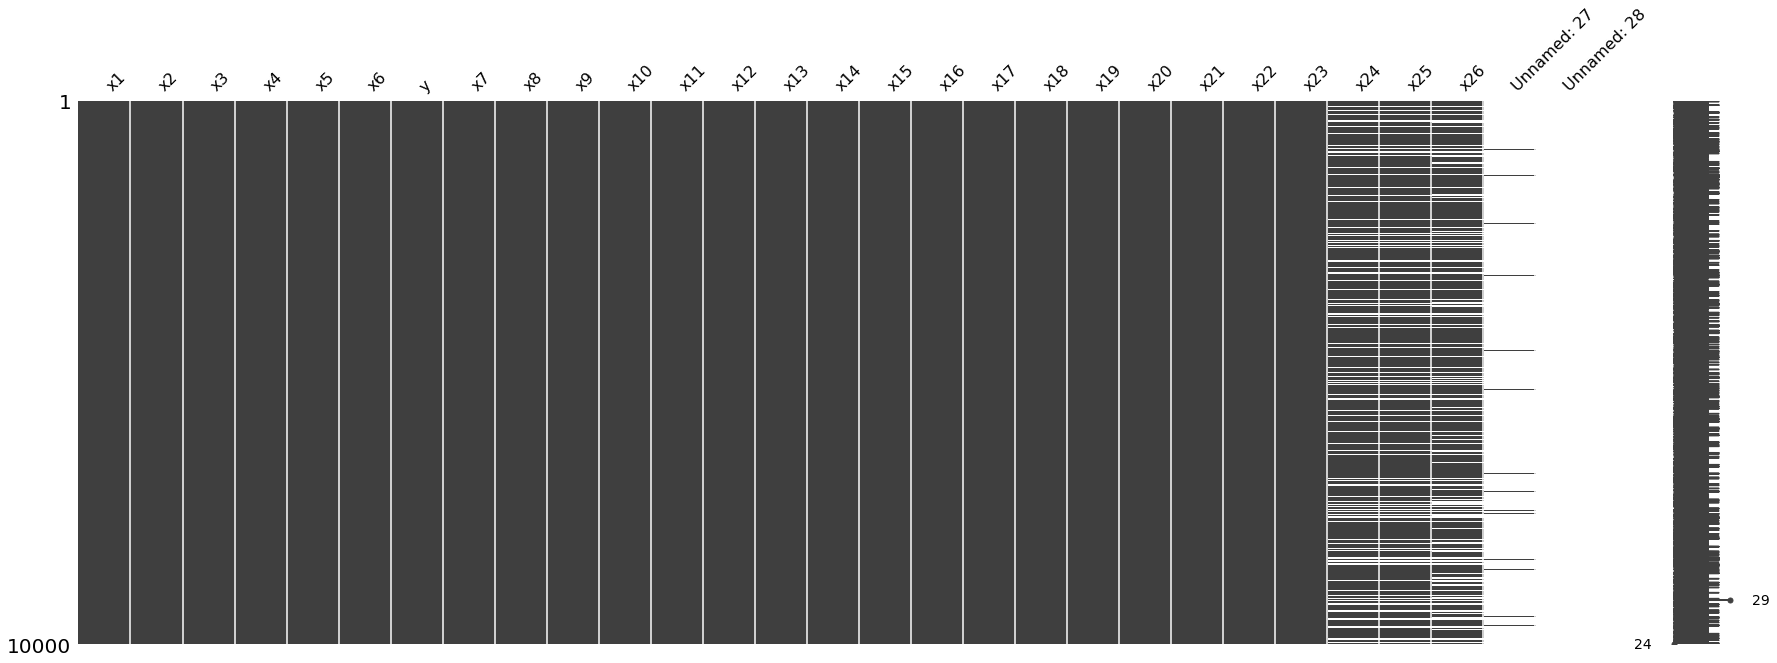

x1                0
x2                0
x3                0
x4                0
x5                0
x6                0
y                 0
x7                0
x8                0
x9                0
x10               0
x11               0
x12               0
x13               0
x14               0
x15               0
x16               0
x17               0
x18               0
x19               0
x20               0
x21               0
x22               0
x23               0
x24            1769
x25            1769
x26            2342
Unnamed: 27    9657
Unnamed: 28    9999
dtype: int64

In [294]:
# Missing data

# look at the # of missing points in all remaining columns
missingno.matrix(original_data, figsize = (30,10))
plt.show()

# Get the number of missing data points per column
missing_values_count = original_data.isnull().sum()
missing_values_count

From the above output we can see that 23 of the 28 features there are no missing values. For X24 - X27 between 17.60% and 23.42% is missing. We'll try impute these values. For x27 and x28 more than 95% is missing, so we'll omit these columns from the model.

# Data cleaning

In [295]:
# Duplicates
df_duplicates = original_data.duplicated()
df_duplicates.unique()

# From the above code we can see that there are no duplicate entries in this dataset.

array([False])

In [103]:
# All the alphanumeric data types
original_data.select_dtypes(include = 'object').columns

# All the numeric data types
original_data.select_dtypes(include = 'number').columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x8', 'x15', 'x16', 'x17', 'x23', 'x24',
       'x25', 'x26', 'Unnamed: 27'],
      dtype='object')

In [305]:
# Data cleaning function
def clean_data(input_df):
    out = input_df.copy()
    
    # Imputing missing values with the mode
    out.x26.fillna('Bidalgo Facebook', inplace=True)
    out.Release_1.fillna('0', inplace=True)
    out.Release_2.fillna('0', inplace=True)
    
    # Using column x2 to split out versions and releases from one another - this might be significant
    out['x2_list'] = out['x2'].astype(str).str.split('.')
    out['Version'] = out['x2_list'].apply(lambda x : x[0]) #Same as column x17, which we'll drop below
#     out['Release_1'] = out['x2_list'].apply(lambda x : x[1] if len(x) > 1 else None)
#     out['Release_2'] = out['x2_list'].apply(lambda x : x[2] if len(x) > 2 else None)
    
    # Using column x3 to split the make and model of the computer, and then dropping the column
    # We can drop column x15 as well as x3 now seeing that Make and Model now cater for these two columns
    out['x3'] = out['x3'].astype(str).str.replace("-", "_")
    out['x3_list'] = out['x3'].astype(str).str.split('_')
    out['Make'] = out['x3_list'].apply(lambda x : x[0])
    out['Model'] = out['x3_list'].apply(lambda x : x[1] + "_" + x[2] if len(x) > 2 else None)
    
    # Found a suspicious row where column x5 = 'US'. Seeing that it's only one row this record will be excluded
    out.drop(axis=0, index=3952, inplace=True)
    
    # Converting string columns to integer
    cols_to_convert = ['x5', 'x8', 'x16', 'Version']
    for col in cols_to_convert:
        out[col] = out[col].astype(int)
    
    # Dropping redundant columns
    out.drop(['x1', 'x2', 'x2_list', 'x3_list', 'x3', 'x15', 'x17', 'x24', 'x25', 'Unnamed: 27', 'Unnamed: 28'], axis=1, inplace=True)
    
    # Working on column x23 - converting to numeric
#     out.loc[out.x23 == 'TRUE','x23'] = 1
#     out.loc[out.x23 == 'FALSE','x23'] = 0
    
    return out 

In [306]:
# Inspect the cleaned data
cleaned_data = clean_data(original_data)

In [307]:
# Splitting string columns from numeric columns
string_cols = cleaned_data.select_dtypes(include='object').columns
numeric_cols = [k for k in cleaned_data.columns if k not in string_cols] 

In [308]:
# Creating separate dataframes for numeric and string columns
cleaned_data_str = cleaned_data[string_cols].copy()

# Encoding the alphanumeric columns using get_dummies
cleaned_data_str_encoded = pd.get_dummies(cleaned_data_str)

In [312]:
cleaned_data_str['x23'].unique()

array(['FALSE', 1], dtype=object)

In [195]:
# Concatenating the string and numeric columns again to form a single set 'Modelling data'
cleaned_data_num = cleaned_data[numeric_cols].copy()
modelling_data = pd.concat([cleaned_data_num, cleaned_data_str_encoded], axis=1)
modelling_data.shape

(9999, 934)

In [198]:
# Separating response variable from the features
response = 'y'
features = [k for k in cleaned_data_str_encoded.columns if k != response]

X = modelling_data[features]
y = modelling_data[response]

In [199]:
# Splitting the data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modelling - Multiple linear regression model

In [285]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

gbr_model = GradientBoostingRegressor()

# to create the model, we use fit(x,y)
gbr_model.fit(X_train,y_train)
y_pred = gbr_model.predict(X_test)

10.392251575538145


In [287]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(gbr_model, open(filename, 'wb'))

# Model performance

In [282]:
from sklearn.metrics import mean_squared_error
from math import sqrt

RMSE = sqrt(mean_squared_error(y_test, y_pred))
print(RMSE)

10.331314031451956

In [290]:
# Dumping encoded variables
pickle.dump(list(cleaned_data_str_encoded.columns), open('dummy_cols.sav', 'wb'))